In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Insert the name of the directory where the log files are stored

In [7]:
name = 'fit_funct_davide'

In [36]:
data1 = pd.read_csv('data/' + name + '/fit_funct_davide_1.csv', header = None)
data1.columns = ['gen', 'log']
data1['fitness'] = data1.log.apply(lambda x: float(x.split(',')[0].replace('[', '')))
data1['age'] = data1.log.apply(lambda x: float(x.split(',')[1]))
data1['score'] = data1.log.apply(lambda x: float(x.split(',')[2].replace(']', '')))
data1.drop(columns = ['log'], inplace = True)

In [45]:
os.listdir(os.path.join('data', name))

['fit_funct_davide_0.csv', 'fit_funct_davide_1.csv', 'fit_funct_davide_2.csv']

In [51]:
for i, data_dir in enumerate(os.listdir(os.path.join('data', name))):
    
    data1 = pd.read_csv(os.path.join('data', name, data_dir), header = None)
    data1.columns = ['gen', 'log']
    
    data1['fitness'] = data1.log.apply(lambda x: float(x.split(',')[0].replace('[', '')))
    data1['age'] = data1.log.apply(lambda x: float(x.split(',')[1]))
    data1['score'] = data1.log.apply(lambda x: float(x.split(',')[2].replace(']', '')))
    
    data1.drop(columns = ['log'], inplace = True)
    
    if i == 0:
        
        data = data1.copy()
    
    else:
        
        data['fitness'] += data1['fitness']
        data['age'] += data1['age']
        data['score'] += data1['score']

data['fitness'] = data['fitness'] / i 
data['age'] = data['age'] / i
data['score'] = data['score'] / i

data.set_index('gen', inplace = True)

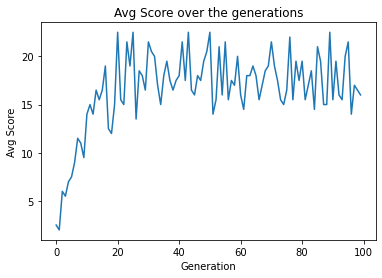

In [57]:
plt.plot(data.index, data.score)
plt.title('Avg Score over the generations')
plt.xlabel('Generation')
plt.ylabel('Avg Score')
plt.show()

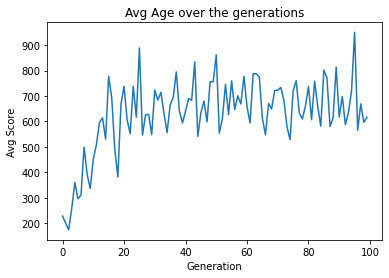

In [58]:
plt.plot(data.index, data.age)
plt.title('Avg Age over the generations')
plt.xlabel('Generation')
plt.ylabel('Avg Score')
plt.show()

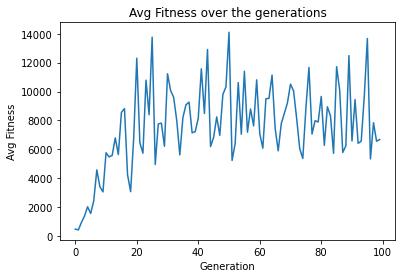

In [59]:
plt.plot(data.index, data.fitness)
plt.title('Avg Fitness over the generations')
plt.xlabel('Generation')
plt.ylabel('Avg Fitness')
plt.show()